In [1]:
import pandas as pd
course_name = ['Data Science', 'Machine Learning', 'Big Data', 'Data Engineer']
duration = [2,3,6,4]
df = pd.DataFrame(data = {'course_name' : course_name, 'duration' : duration})

<br></br>
## 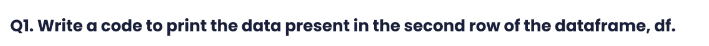

In [2]:
df[1:2]

,course_name,duration
1,Machine Learning,3


---
<br></br>
## 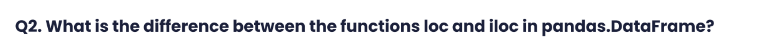

> difference between `loc` and `iloc` :
>- `iloc` is int-based, means to select rows and columns we only can use their respective intger indeces. Where `loc` is label-based, means we can select rows and columns even with their respective label name
>- when we try to slice the dataframe with `loc`, it gives the result including the last index. for example if we do `df.loc[1 : 3]`, it include 3rd row. while `iloc` behave like normal list slicing. for example if we do `df.iloc[1 : 3]`, it exclude the 3rd row

---
<br></br>
## 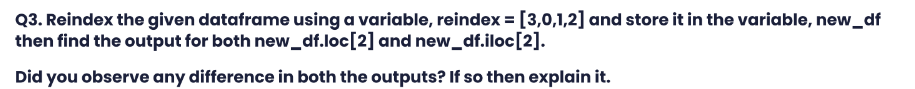

In [3]:
new_df = df.reindex([3, 0, 1, 2])

In [4]:
new_df.loc[2]

course_name    Big Data
duration              6
Name: 2, dtype: object

In [5]:
new_df.iloc[2]

course_name    Machine Learning
duration                      3
Name: 1, dtype: object

<br></br>
There's a difference with both output. 
- since `loc` label-based indexing method, it's give the result according to the label. means 'loc' select the row with index lable 2 and returns it.
- In case of `iloc`, iloc is position-based indexing method. means it doesn't care about lable of rows. it simply return the row which found in 2nd index position

---
<br></br>
## 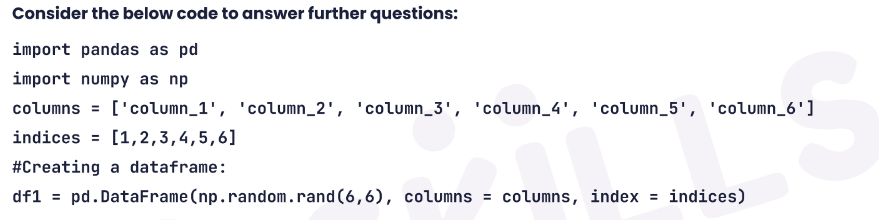

In [6]:
import pandas as pd
import numpy as np
columns = ['column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_6']
indices = [1,2,3,4,5,6]
#Creating a dataframe:
df1 = pd.DataFrame(np.random.rand(6,6), columns = columns, index = indices)

<br></br>
### 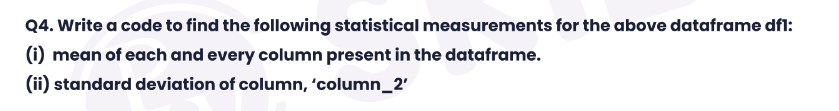

In [7]:
''' 1. mean of each and every column present in dataframe df1 '''

df1.mean()

column_1    0.342069
column_2    0.522797
column_3    0.585129
column_4    0.257165
column_5    0.429177
column_6    0.397398
dtype: float64

In [8]:
''' 2. standard deviation of column `column_2` '''

df1['column_2'].std()

0.3495253743622853

---
<br></br>
### 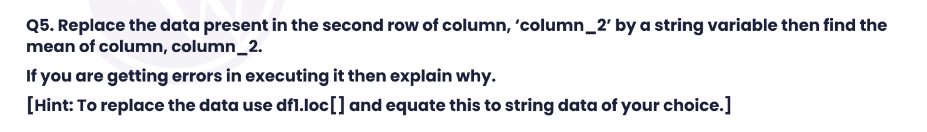

In [10]:
df1.loc[2, 'column_2'] = 'my_string'

In [11]:
try :
    res = df1['column_2'].mean()
except TypeError as e :
    print(e)
else :
    print(res)

unsupported operand type(s) for +: 'float' and 'str'


> the error is a type error telling we can't use `+` operand between float and str.

> when we try to get mean of any series, first it add all values in that series after it devide it with total no of ele on that series.

>now while adding in 'column_2'.
>- first it try to add 1st row's value (0.888633) which is float value with 2nd row's value ('my_string') which is a string object. but we can't add between a float and a string object. so the type error raised

---
<br></br>
### 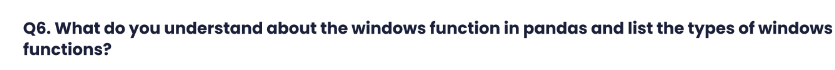

> `Windows Function` : Windows Function allow us to perform calculations on a specified subset of rows within a DataFrame.

> Threre's 2 type of windows function in pandas :
> 1. Rolling Window Functions
> 2. Expanding Window Functions

---
<br></br>
### 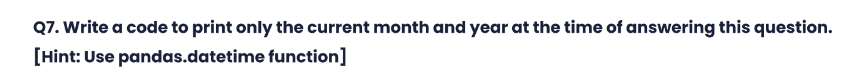

In [12]:
#the pandas.datetime class is deprecated
# current = pd.datetime.now() 

current = pd.Timestamp.now()
current.strftime('%B %Y')

'March 2023'

---
<br></br>
## 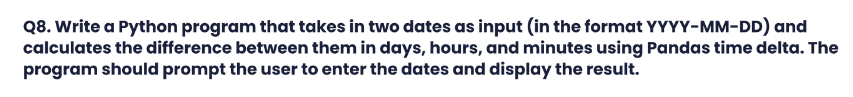

In [14]:
date1 = input('Enter a Date (YYYY-MM-DD) : ')
date2 = input('Enter another Date (YYYY-MM-DD) : ')

date1 = pd.to_datetime(date1)
date2 = pd.to_datetime(date2)


duration = date1 - date2
delta = pd.Timedelta( duration )

days = delta.days
hours = delta.seconds // 3600
minutes = (delta.seconds % 3600) // 60
seconds = delta.seconds % 60

print(f'the difference between ({date1}) and ({date2}) is : {days} days, { hours } hours, { minutes } minutes, { seconds } seconds')

Enter a Date (YYYY-MM-DD) :  2023-01-01
Enter another Date (YYYY-MM-DD) :  2022-12-23


the difference between (2023-01-01 00:00:00) and (2022-12-23 00:00:00) is : 9 days, 0 hours, 0 minutes, 0 seconds


---
<br></br>
## 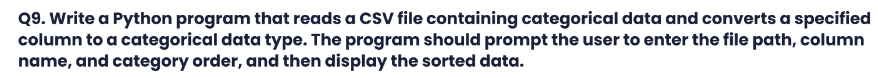

In [15]:
try :
    file_path = input('Enter your csv file path: ')
    
    # if given path starts with quotes then remove it
    if file_path and file_path[0] in {'"', "'"} : 
        file_path = file_path[1:-1]
    
    df = pd.read_csv(file_path)
    
except [FileNotFoundError, OSError] as e : 
    print(e)

else :
    cat_col = input('Enter column name : ')
    cat_ord = input('Enter complete Category order (space-separated) :').split()
    
    # converting the specified column to categorical data type
    df[cat_col] = pd.Categorical(df[cat_col], categories=cat_ord, ordered=True)
    
    # sort the dataframe
    df.sort_values(cat_col, inplace=True)
    
    # displaying the sorted dataframe
    print('\n', df )
    

Enter your csv file path:  dummy.csv
Enter column name :  Color
Enter complete Category order (space-separated) : R Y B P



   Name Color  Dunno
0    A     R      1
4    E     R      5
6    G     R      7
3    D     Y      4
5    F     Y      6
1    B     B      2
7    H     B      8
2    C     P      3
8    I     P      9
9    J     P     10


---
<br></br>
## 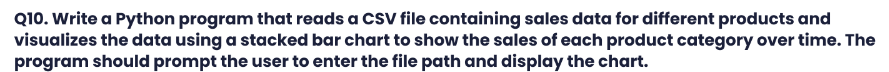

### Assuming the csv file must have 3 columns named, `Time` and `Category` and `Sales`

Enter your csv file path:  sales.csv


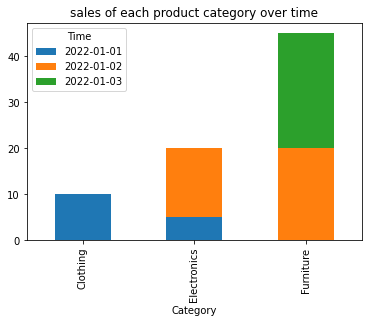

In [16]:
try :
    file_path = input('Enter your csv file path: ')
    
    # if given path starts with quotes then remove it
    if file_path and file_path[0] in {'"', "'"} : 
        file_path = file_path[1:-1]
        
    sales = pd.read_csv(file_path)
    
except Exception as e :
    print(e)
    
else :
    data = sales.groupby(['Category', 'Time'])['Sales'].sum().unstack()
    data.plot(kind='bar', stacked=True, title='sales of each product category over time')
    

---
<br></br>
## 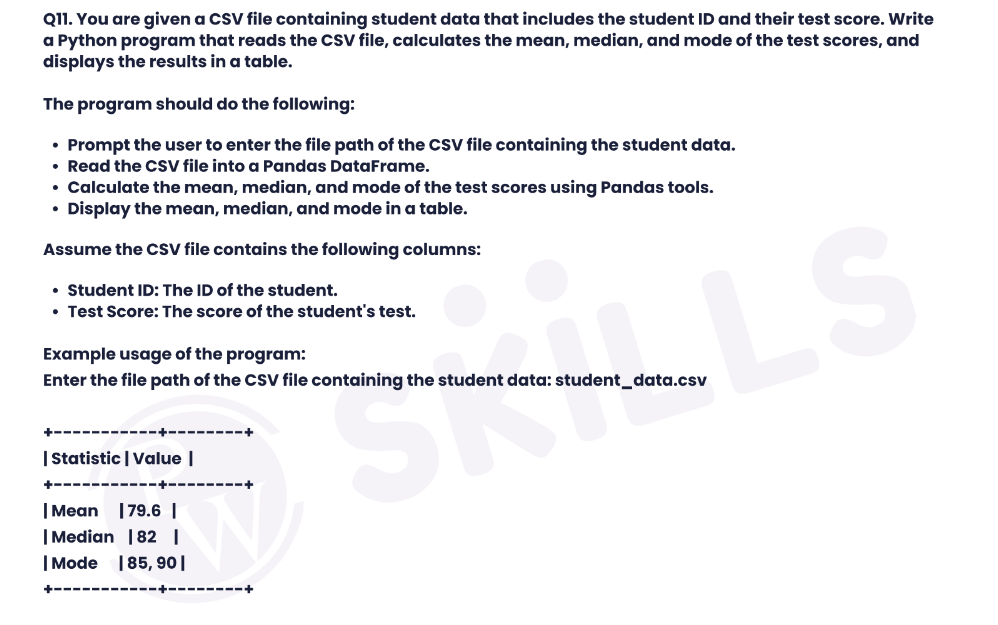 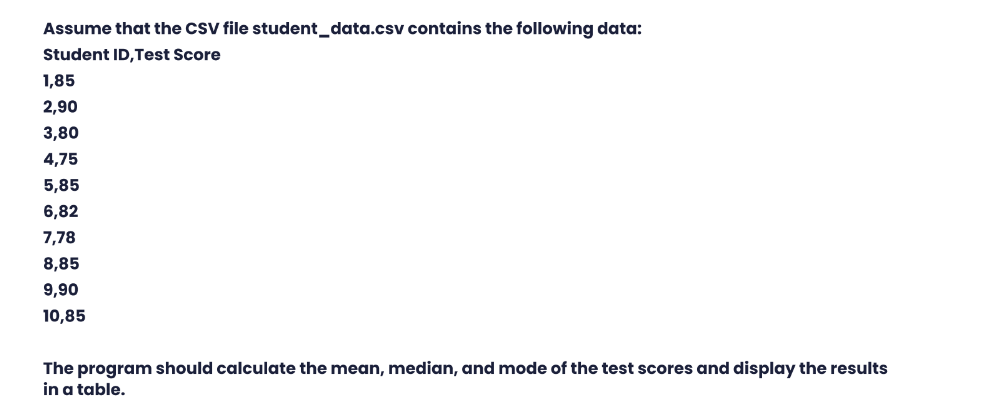

In [17]:
file_path = input( 'Write Your csv file path : ' )
df = pd.read_csv(file_path)

mean = df['Test Score'].mean()
median = df['Test Score'].median()
mode = df['Test Score'].mode()


data = pd.DataFrame({'Statistic' : ['Mean', 'Median', 'Mode'], 'Value' : [mean, median, ','.join(str(m) for m in mode)]})
data

Write Your csv file path :  C:\Users\ankan\OneDrive\Desktop\student_data.csv


,Statistic,Value
0,Mean,83.5
1,Median,85.0
2,Mode,85
